# 8.1 ISC-CI Model

The ISC-CI model introducing a mechanism for context inference, based on the key assumption that temporal co-occurrence provides a useful basis for inferring shared context. Specifically, it assumes that (1) objects occurring together in a given context tend to share the properties elicited by that context; (2) these co-occurrence statistics are learned over the course of development; and (3) this implicit knowledge provides a basis for inferring, from a few examples of objects encountered in a new context, both which features are relevant in that context and what other objects are likely to occur in that context.

To make these ideas clear, consider the contexts in which you might encounter different kinds of birds: a bird-watching field trip in science class, a visit to the bird section of the zoo, and a picture book about birds. Each situation involves multiple types of birds (e.g., robins, crows, and ravens) and exposure to multiple bird-related properties (e.g., can-fly, eats-worms, is-bird) in various combinations. After these experiences, encountering a new context in which birds are relevant (e.g., learning that crows and ravens have hollow bones in the bird section of the Natural History museum) is likely to be interpreted as relating specifically to birds and their
properties, implying that other birds like robins may also occur in this new context, and that
they will share similar properties (e.g., robins also have hollow bones).

Conversely, contexts such as a science lesson on aerodynamics, a visit to a flight exhibit at a science museum, and
a film on the history of flight are likely to involve multiple types of flying things (e.g., crows,
airplanes, and butterflies) and flight-related properties (e.g., can-fly, has-wings, seen-in-the-sky). This suggests that a new context involving flying objects such as crows and airplanes (e.g., learning that crows and airplanes are associated with Bernoulli’s principle) likely relates to all things that can fly, implying that other flying things like butterflies may also occur in this new context and, again, share similar properties (e.g., butterflies are also associated with Bernoulli’s principle).

Thus, the properties shared by items encountered in a situation can provide a clue about what the current context is, what properties are currently important, and what other items are likely or unlikely also to be observed. The central hypothesis embodied by the ISC-CI model is that learning such environmental structure can support future inferences about which features might be relevant in novel contexts, based on the distribution of items that co-occur in those contexts. That is, observing that a new context involves a certain set of objects (e.g., both robins and airplanes) provides evidence that certain features will be context-relevant (e.g., can-fly and has-wings), but not
others (e.g., lays-eggs), based on past experience.

Importantly, this process is graded and probabilistic rather than absolute, as any given set of objects can co-occur in different contexts at different frequencies. In particular, features that are broadly true of many objects are less likely to be relevant in a new context than features that are true of the more limited set of objects seen in that context (Griffiths et al., 2010; Xu & Tenenbaum, 2007). This is because there is a low likelihood of observing any particular set of objects in a broad context: there are many animals, but few Corvidae, so it is more likely that a context involving both crows and ravens relates to Corvidae specifically than it is that this context relates to animals in general. This is because the probability of observing both crows and ravens in the context of animals is lower than the probability of oberseving both crows and ravens in the context of Corvidae.

*Setup and Installation:*

In [8]:
%%capture
%pip install psyneulink

import psyneulink as pnl
import pandas as pd
import random

## Generating the Training Data

### Feature Co-occurrences

We design a training environment that simulates experiencing object co-occurrences throughout learning under the key assumption noted just above. The environment consisted of a series of episodes corresponding to different contexts. Each context involved a set of objects that share a common semantic feature (e.g., things that are birds, things that can fly, things that are found in the zoo, etc.), with each feature represented by a single output unit as implemented by the feature labels in the ISC-CI model.

We generate the episodes using the objects and features in the Leuven Concepts Database (De Deyne & Storms, 2008; Storms, 2001; Ruts et al., 2004). That database contains a matrix of binary judgments provided by human raters indicating, for each object-feature pairing, whether the object possess the feature (e.g., does a bear weigh more than 100lbs? Are kangaroos found in zoos?).

Let's explore the dataset


In [9]:
FEATURE_PATH = 'https://raw.githubusercontent.com/PrincetonUniversity/NEU-PSY-502/refs/heads/main/data/isc_ci/features.csv'

feature_df = pd.read_csv(FEATURE_PATH, index_col=0)

feature_df.head()

,is small,is a bird,is an animal,is big,can fly,is an insect,mammal,is a fish,lays eggs,is brown,...,is for all ages,you can play different notes whit it,can be used to put something in,can be bought in sports store,costs a lot of money,drives above the ground,driven by 1 person,used in water,used in the house,worn often
monkey,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
beaver,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
bison,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dromedary,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
squirrel,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Exercise 1a{exercise}

As stated above, a context is defined by the common feature shared by the objects in that context. For this dataset, which objects might occur in the "eats mice" context?

Solution{solution}

We can find the objects that might occur in the "eats mice" context by filtering the dataset for the feature "eats mice" and extracting the corresponding object names:

```python
eats_mice = feature_df[feature_df['eats mice'] == 1].index.tolist()
```

Exercise 1b{exercise}

As stated above, encountering different objects in the same episode provides evidence to the agent that they are in a specific context. For this dataset, which context might be defined by the object "owl" (and which by "falcon")?

Solution{solution}

The contexts are defined by the features of the objects:

```python
contexts_owl = feature_df.columns[feature_df.loc['owl'] == 1]
contexts_falcon = feature_df.columns[feature_df.loc['falcon'] == 1]

print('Contexts defined by "owl":', contexts_owl)
print('Contexts defined by "falcon":', contexts_falcon)
```



Exercise 1c{exercise}

Objects can appear in various contexts. So for two given objects, they might define multiple contexts. What possible contexts are defined by "owl" and "falcon" together?

Solution{solution}

The possible contexts are defined by the features that are shared by "owl" and "falcon":

```python
contexts_both = feature_df.columns[(feature_df.loc['owl'] == 1) & (feature_df.loc['falcon'] == 1)]
print(contexts_both)
```


Exercise 1d{exercise}

Now (using the theory from above), try to answer the following question: Given an agent experiences an episode with "owl" and "falcon" defining the context. Would the agent be more surprised by encountering a "cat" in this context or "penguin"?

(This is not a straight forward question, and you are not supposed to give a definite answer. Think about different (probabilistic/statistical) features of the world influencing the agent's prediction).

Tip: Here we make the (unreasonable) assumption that contexts are uniformly distributed. In other words that any episode (being on a bird-watching tour or being in a science lesson) has occurred equally often in the past.

Hint a{hint}

In the exercise above, we've seen that "owl" and "falcon" can elicit different contexts. But is there a way to "quantify" which of these contexts is more likely to be elicited?

Tip: This depends on how likely it is to encounter both an "owl" and a "falcon" in any of the given contexts.

Hint b{hint}

We calculate the probabilities from above:

```python
contexts_both = feature_df.columns[(feature_df.loc['owl'] == 1) & (feature_df.loc['falcon'] == 1)]

context_probabilities = {}

for c in contexts_both:
    objects = feature_df[feature_df[c] == 1].index.tolist()
    nr_objects = len(objects)
    # Simplification (objects are equally likely):
    # The probability for encountering any object is 1 / nr_objects
    # => the probability of 'drawing' two objects is 1 / nr_objects^2
    probability = 1 / nr_objects**2
    context_probabilities[c] = probability

print(context_probabilities)
print()
most_probabl_context = max(context_probabilities, key=context_probabilities.get)
print(most_probabl_context)
```

Hint c{hint}

The code above shows that the most probable context is "eats mice". But "penguins" don't eat mice while "cats" do (You can convince yourself by querying the database :). So if the agent encounters a "cat" it should be less surprised than if it encounters a "penguin".

However, this is just the most probable context. Although "penguin" doesn't appear in the most probable context of "owl" and "falcon", this might be offset by "penguin" appearing in more probable contexts than "cat".

Solution{solution}

First, we calculate the probabilities of encountering "owl" and "falcon" in any given context. We normalize these probabilties and use them as weights:
We add all the probabilities of contexts where "penguin" also appears vs "cat":

```python
contexts_both = feature_df.columns[(feature_df.loc['owl'] == 1) & (feature_df.loc['falcon'] == 1)]

context_probabilities = {}

for c in contexts_both:
    objects = feature_df[feature_df[c] == 1].index.tolist()
    nr_objects = len(objects)
    probability = 1 / nr_objects**2
    context_probabilities[c] = probability

# normalize the to get the probabilty of a certain context beeing evoked
sum_probs = sum(context_probabilities.values())
normalized = {c: p / sum_probs for c, p in context_probabilities.items()}

penguin_weight = 0
penguin_nr = 0
cat_weight = 0
cat_nr = 0


for c, v in normalized.items():
    objects = feature_df[feature_df[c] == 1].index.tolist()
    # the context evokes penguin
    if 'penguin' in objects:
        penguin_weight += v
        penguin_nr += 1
    # the context evokes cat
    if 'cat' in objects:
        cat_weight += v
        cat_nr += 1

print(f'penguins({penguin_nr}): {penguin_weight}')
print(f'cats({cat_nr}): {cat_weight}')
```

### Embedding

The ISC-CI model uses as input a word embedding (not a one-hot encoding). This embedding can be interpreted as "context independent" representation. Here, we load the embeddings:

In [10]:
EMBEDDING_PATH = 'https://raw.githubusercontent.com/PrincetonUniversity/NEU-PSY-502/refs/heads/main/data/isc_ci/embeddings.csv'

embeddings_df = pd.read_csv(EMBEDDING_PATH, index_col=0)

chicken_embedding = embeddings_df.loc['chicken']
chicken_embedding

0     0.119731
1     0.987248
2     0.982023
3     0.410961
4     0.451753
        ...   
59    0.022675
60    0.326714
61    0.014851
62    0.035483
63    0.982558
Name: chicken, Length: 64, dtype: float64

Exercise 2{exercise}

We can ask the same question as above: Can you think about a way of using the embeddings of "owl", "falcon", "cat" and "penguin" to quantify weather the agent would be more surprised by encountering a "cat" or a "penguin" in the context of "owl" and "falcon"?

Hint{hint}

With word embeddings, we can calculate similarities between words by using the distance.

Solution{solution}

We calculate the distance between the embeddings of "owl" and "falcon" to the embeddings of "cat" and "penguin":

```python
owl_emb = embeddings_df.loc['owl']
falcon_emb = embeddings_df.loc['falcon']
cat_emb = embeddings_df.loc['cat']
penguin_emb = embeddings_df.loc['penguin']

owl_falcon_emb = (owl_emb + falcon_emb) / 2

cat_distance = ((owl_falcon_emb - cat_emb)**2).sum()
penguin_distance = ((owl_falcon_emb - penguin_emb)**2).sum()

print('cat distance ', cat_distance)
print('penguin distance ', penguin_distance)
```

Note, the "context"-calculations and "embedding"-calculations lead to different predictions:

- context -> "cat" is less surprising in "owl", "falcon" context
- embedding  -> "penguin" is less surprising in "owl", "falcon" context

### Training Data

Now, we construct a set of episodes by uniformly sampling from the set of features with replacement, so that each episode involved one shared semantic feature that defined the associated context. Given this feature, we generated a support set by uniformly sampling two items sharing the feature, and a query set by uniformly sampling one additional item sharing the feature (positive) and one that is not sharing the feature (negative). Note, that as above-mentioned, any given set of objects can co-occur in multiple contexts (in other words can share multiple features), however, for features tha are broadly true of many objects, it is less likely for each specific pair of objects to be sampled. For example, if the feature is "eats mice", the likelihood of sampling exactly {"owl", "falcon"} is higher than if the feature is "is a bird" (since there are many more birds than mice eaters).

In [11]:
def get_random_episode():
    # randomly pick a context (feature)
    feature = random.choice(feature_df.columns)

    # one hot encoded feature vector is our context:
    context_label = [0] * len(feature_df.columns)
    context_label[feature_df.columns.get_loc(feature)] = 1

    # get objects that have this feature by name
    objects_included = feature_df[feature_df[feature] == 1].index.tolist()

    # get objects that don't have this feature
    objects_excluded = feature_df[feature_df[feature] == 0].index.tolist()

    # randomly pick two supports (can be the same twice)
    support = random.choices(objects_included, k=2)

    # the support vector is the embedding of the two supports
    support_vector_1 = embeddings_df.loc[support[0]]
    support_vector_2 = embeddings_df.loc[support[1]]

    # decide weather to pick an object that is in the context or not
    choice = random.choice([0, 1])

    if choice == 0:
        # pick an object that is not in the context
        query = random.choice(objects_excluded)
    else:
        # pick an object that is not in the context
        query = random.choice(objects_included)

    # the query vector is the embedding of the query
    query_vector = embeddings_df.loc[query]

    return {
        'context_label': context_label,
        'support_1': support_vector_1,
        'support_2': support_vector_2,
        'query': query_vector,
        'response': [1, 0] if choice > .5 else [0, 1]
    }

## PsyNeuLink Model

![ISC-CI](https://princetonuniversity.github.io/NEU-PSY-502/_static/images/502B/computation/iscci/iscci.png)

We design the model to infer the context from the objects in the support set and use this to make predictions about objects in the query set. The model’s architecture contains a context independent layer that encodes cross-context information, a context layer that encodes information about which features are relevant in the given context, and a context-dependent layer which selectively encodes context-relevant information. The ISC-CI model processes the items in the support set and uses this both to generate an internal representation of context and provide a predicted context-specific shared semantic feature label as output.

The ISC-CI model makes inferences about the current context using objects in the support set by sequentially observing each object in the support set, encoding each in the context independent layer, and integrating these representations by taking their average. This can be viewed as a very simple form of recurrence that accumulates (by linearly integrating and normalizing) activity across the items in the support set in the context independent layer.

The ISC-CI model makes predictions about which items in the query set occur in the current context. It does so by forming a context dependent representation that takes into account the context inferred from the support set together with the context-independent representation of the query set item. The model then uses this context dependent representation to activate the binary yes/no output unit indicating the likelihood that the query set item occurs in the current context.


Exercise 3a{exercise}

Convince yourself that as context independent layer, we can use the embeddings of the support and query labels. In our PsyNeuLink implementation, we will "skip" the one-hot encoded labels and use the embeddings loaded earlier as input directly.

Solution{solution}

The context independent layer captures context independent statistical properties of the objects (words). Word embeddings are a good representation of these properties and in many cases specifically trained to capture these properties (compare, for example, word2vec).

Exercise 3b{exercise}

Explain -in your own words - why calculating the mean of the support embeddings a form of integration. Could you think about a different way of integrating the support embeddings?

Hint{hint}

The mean of the support embeddings combines the information of multiple support vectors into one representation. However, does the order of the support vectors matter? Could you think about a way of integrating the support embeddings in a way that most recent support vectors have more weight than older ones?

Solution{solution}

The mean of the support embeddings is a form of integration because it combines the information from multiple support embeddings into a single representation. This allows the model to capture the shared properties of the objects. Other ways of integrating the support embeddings could include using a weighted sum or recurrent neural networks (RNNs or other forms of temporal integration like LSTM or GRU). These methods would allow to integrate the support vectors "over time" and take into account the order of the support embeddings.

Exercise 3c{exercise}

Before implementing the model, think about the dimensions of the different layers:

context independent, mean, context, context label, context dependent, and response

Solution{solution}

The dimensions of the different layers are as follows:
- context independent: embedding dimension
- mean: embedding dimension
- context: arbitrary dimension (128 in the paper)
- context label: number of features in the feature set
- context dependent: arbitrary but the same as the context dimension
- response: 2 (yes/no)

In [18]:
N_EMBEDDING = embeddings_df.shape[1]
HIDDEN_CONTEXT = 128
N_CONTEXT = feature_df.shape[1]
LEARNING_RATE = 0.01


def create_model(
):
    ## Mechanisms
    # Here, we use 2 support vectors (but we could use more)
    support_1 = pnl.TransferMechanism(
        name='support_1',
        input_shapes=N_EMBEDDING
    )

    support_2 = pnl.TransferMechanism(
        name='support_2',
        input_shapes=N_EMBEDDING
    )

    # The mean of the support vectors is calculated by adding them
    # and multiplying by .5
    mean = pnl.TransferMechanism(
        name='mean',
        input_shapes=N_EMBEDDING,
        function=pnl.Linear(slope=.5),

    )
    context = pnl.TransferMechanism(
        name='context',
        input_shapes=HIDDEN_CONTEXT,
        function=pnl.ReLU()
    )

    context_label = pnl.TransferMechanism(
        name='context_label',
        input_shapes=N_CONTEXT,
        function=pnl.SoftMax()
    )

    query = pnl.TransferMechanism(
        name='query',
        input_shapes=N_EMBEDDING
    )

    context_dependent = pnl.TransferMechanism(
        name='context_dependent',
        input_shapes=HIDDEN_CONTEXT,
        function=pnl.ReLU()
    )

    response = pnl.TransferMechanism(
        name='response',
        input_shapes=2,
        function=pnl.SoftMax(),
    )

    ## Projections

    projection_mean_to_context = pnl.MappingProjection(
        name='projection_mean_to_context',
        matrix=pnl.RandomMatrix(0, .01),
        learnable=True
    )

    projection_query_to_context_dependent = pnl.MappingProjection(
        name='projection_query_to_context_dependent',
        matrix=pnl.RandomMatrix(0, .01),
        learnable=True
    )

    projection_context_to_context_label = pnl.MappingProjection(
        name='projection_context_dependent_to_context_out',
        matrix=pnl.RandomMatrix(0, .01),
        learnable=True
    )

    projection_context_dependent_to_response = pnl.MappingProjection(
        name='projection_query_dependent_to_response',
        matrix=pnl.RandomMatrix(0, .01),
        learnable=True
    )

    ## Pathways

    model = pnl.AutodiffComposition(
        name='embedding',
        pathways=[
            [support_1, pnl.IDENTITY_MATRIX, mean],
            [support_2, pnl.IDENTITY_MATRIX, mean],
            [query, projection_query_to_context_dependent, context_dependent],
            [mean, projection_mean_to_context, context],
            [context, pnl.IDENTITY_MATRIX, context_dependent],
            [context, projection_context_to_context_label, context_label],
            [context_dependent, projection_context_dependent_to_response, response]
        ],
        learning_rate=LEARNING_RATE
    )
    return (model, query, support_1, support_2,
            context_label, response)

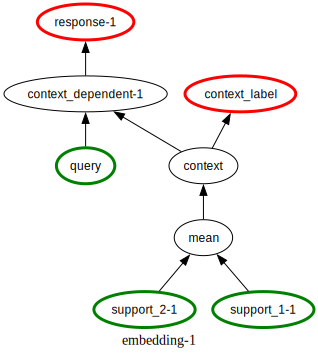

In [19]:
isc_ci_model, query, support_1, support_2, context_label, response = create_model()
isc_ci_model.show_graph(output_fmt='jupyter')

Exercise 4{exercise}

The activation function of the `context label` and the `response` is SoftMax. Do you think these are reasonable activation functions? If so, why?

Solution{solution}

The SoftMax activation function is reasonable for the context label because it outputs a probability distribution over the features. In the section above (generating the training data), we discussed that a context is exactly defined by one feature (a feature that is shared by all support items).

The SoftMax activation function is also reasonable for the response for the same reason. The response is a binary classification task (yes/no) and the SoftMax activation function captures this.

## Training Loop

The model is now trained on 20,000 episodes.

***Note, that this is not enough for the model to converge and just illustrates how a training loop would look like. We don't expect reasonable predictions after training.***

In [14]:
tot_reps = 1
examples_per_rep = 20_000
n_epochs = 1

for reps in range(tot_reps):

    inputs_dict = {
        query: [],
        support_1: [],
        support_2: [],
    }

    targets_dict = {
        context_label: [],
        response: [],
    }

    # Get Trainign
    i = 0
    while i < examples_per_rep:
        example = get_random_episode()
        # Append the input to the dictionary
        inputs_dict[query].append(example['query'])
        inputs_dict[support_1].append(example['support_1'])
        inputs_dict[support_2].append(example['support_2'])

        # Append the targets to the dictionary
        targets_dict[context_label].append(example['context_label'])
        targets_dict[response].append(example['response'])
        i += 1

    # Train the network for `n_epochs`
    result = isc_ci_model.learn(
        inputs={
            'inputs': inputs_dict,
            'targets': targets_dict,
            'epochs': n_epochs
        },
        execution_mode=pnl.ExecutionMode.PyTorch
    )
    # Print a dot for each repetition to track progress
    print('.', end='')
    # Print a new line every 10 repetitions
    if (reps + 1) % 10 == 0:
        print()



.

## Testing

In [15]:
embedding_falcon = embeddings_df.loc['falcon']
embedding_owl = embeddings_df.loc['owl']

embedding_cat = embeddings_df.loc['cat']
embedding_penguin = embeddings_df.loc['penguin']


In [16]:
res_cat = isc_ci_model.run(
    {
        query: embedding_cat,
        support_1: embedding_falcon,
        support_2: embedding_owl,
    })
response.value

array([[0.4971299 , 0.50272648]])

In [17]:
res_penguin = isc_ci_model.run(
    {
        query: embedding_penguin,
        support_1: embedding_falcon,
        support_2: embedding_owl,
    })
response.value

array([[0.47386775, 0.52613219]])

Exercise 5{exercise}

Since the training was not sufficient, the model will not be able to predict the correct response. However, can you explain what the expected outcome for the above support and query items would be?

Solution{solution}

The expected outcome for the above support and query items would be:

Higher split between yes and no for the query cat than for the query penguin.

Exercise 6{exercise}

Even with a larger training set, the model is unlikely to "see" each combination of support and query items for each possible context. How can it still learn contexts for unseen combinations?


Hint{hint}

Why are we using context independent layers in the first place? What would happen if we just use one-hot encodings and skip these independent layer?

Solution{solution}

The embeddings make it so that the model generalizes to unseen combinations since they might be "similar" to seen combinations. For example, birds share features in embedding space. So even if the model hasn't seen specific bird combinations it still learns the context that is elicited by these combinations.

If we just use one-hot encodings and skip the context independent layer, the model would not be able to generalize to unseen combinations since they don't share any activations (everything is orthogonal). This would mean that with enough training, the model would maybe still learn to make correct predictions but never on unseen combinations.